In [ ]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely import wkt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from matplotlib.animation import FuncAnimation
from pandas.plotting import parallel_coordinates
from scipy.stats import norm

In [ ]:
uploaded = files.upload()

Saving Cleaned_Data.csv to Cleaned_Data.csv


In [ ]:
# shape file for Egypt geographic map
shape_file = files.upload()

Saving egy_admbnda_adm1_capmas_20170421.zip to egy_admbnda_adm1_capmas_20170421.zip


In [ ]:
# install geopandas library and import it
!apt install -q libspatialindex-dev
!pip install -q geopandas
import geopandas as gpd

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 340 kB of archives.
After this operation, 1,538 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex6 amd64 1.9.3-1build1 [266 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-c6 amd64 1.9.3-1build1 [58.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-dev amd64 1.9.3-1build1 [16.0 kB]
Fetched 340 kB in 0s (791 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-1build1_amd64.de

In [ ]:
# upload the data
plt.rcParams.update(plt.rcParamsDefault)
ALL_DATA = pd.read_csv("Cleaned_Data.csv")

In [ ]:
# map every branch and governrate to its english equivelant and create new columns (Eng_branch and Eng_gov)
mapper = {'أدبي' : 'Literature' , 'علمي علوم' : 'Science' , 'علمي رياضة' : 'Math'}
governorate_mapper = {
    'الجيزة': 'Giza',
    'بني سويف': 'Beni Suef',
    'الفيوم': 'Fayoum',
    'القاهرة': 'Cairo',
    'الإسماعيلية': 'Ismailia',
    'بورسعيد': 'Port Said',
    'المنوفية': 'Menoufia',
    'الغربية': 'Gharbia',
    'الاسكندرية': 'Alexandria',
    'الشرقية': 'Sharkia',
    'اسيوط': 'Assiut',
    'دمياط': 'Damietta',
    'سوهاج': 'Suhag',
    'الدقهلية': 'Dakahlia',
    'السويس': 'Suez',
    'القليوبية': 'Kalyoubia',
    'البحيرة': 'Behera',
    'كفر الشيخ': 'Kafr El-Shikh',
    'قنا': 'Qena',
    'اسوان': 'Aswan',
    'مطروح': 'Matrouh',
    'المنيا': 'Menia',
    'شمال سيناء': 'North Sinai',
    'البحر الأحمر': 'Red Sea',
    'جنوب سيناء': 'South Sinai',
    'الاقصر': 'Luxor',
    'الوادي الجديد': 'New Valley'
}
ALL_DATA['Eng_branch'] = ALL_DATA['branch'].map(mapper)
ALL_DATA['Eng_gov'] = ALL_DATA['city'].map(governorate_mapper)

In [ ]:
# filter data related to Red sea governrate and store it in Red_sea_data
Red_sea_data = ALL_DATA.loc[ALL_DATA['city'] == 'البحر الأحمر']
Red_sea_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 155016 to 229092
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 2571 non-null   object 
 1   branch               2571 non-null   object 
 2   Percentage           2571 non-null   float64
 3   status               2571 non-null   object 
 4   arabic               2543 non-null   float64
 5   first_foreign_lang   2540 non-null   float64
 6   second_foreign_lang  2542 non-null   float64
 7   pure_mathematics     409 non-null    float64
 8   history              1099 non-null   float64
 9   geography            1099 non-null   float64
 10  philosophy           1101 non-null   float64
 11  psychology           1102 non-null   float64
 12  chemistry            1436 non-null   float64
 13  biology              1034 non-null   float64
 14  geology              1036 non-null   float64
 15  applied_math         409 non-nu

In [ ]:
#Grouping the dataset by the branch.
All_literature_students = ALL_DATA.loc[ALL_DATA['branch'] == 'أدبي']
All_science_students = ALL_DATA.loc[ALL_DATA['branch'] == 'علمي علوم']
All_math_students = ALL_DATA.loc[ALL_DATA['branch'] == 'علمي رياضة']

In [ ]:
All_science_students.head()

,city,branch,Percentage,status,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,gender,Eng_branch,Eng_gov
1,الجيزة,علمي علوم,57.32,ناجح,47.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN,30.0,30.0,44.0,NaN,33.0,F,Science,Giza
7,الجيزة,علمي علوم,65.37,ناجح,64.0,29.0,36.0,NaN,NaN,NaN,NaN,NaN,37.0,30.0,42.0,NaN,30.0,M,Science,Giza
15,الجيزة,علمي علوم,77.07,ناجح,67.0,42.0,38.0,NaN,NaN,NaN,NaN,NaN,38.0,48.0,51.0,NaN,32.0,F,Science,Giza
17,الجيزة,علمي علوم,67.56,ناجح,66.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,43.0,45.0,NaN,30.0,F,Science,Giza
26,الجيزة,علمي علوم,82.44,ناجح,76.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0,55.0,59.0,NaN,44.0,M,Science,Giza


In [ ]:
#Further filter each branch by the city of Red sea
RedSea_literature_students = All_literature_students.loc[All_literature_students['city'] == 'البحر الأحمر']
RedSea_science_students = All_science_students.loc[All_science_students['city'] == 'البحر الأحمر']
RedSea_math_students = All_math_students.loc[All_math_students['city'] == 'البحر الأحمر']

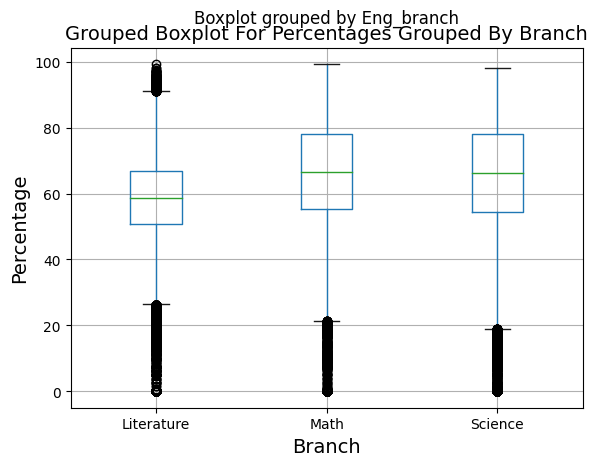

In [ ]:
# create a boxplot for percentages grouped by branch
ALL_DATA.boxplot(column='Percentage', by='Eng_branch')
# set axis labels and title
plt.xlabel('Branch',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Grouped Boxplot For Percentages Grouped By Branch',fontsize=14)
# set the font size of the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# set the font size of the title
plt.show()

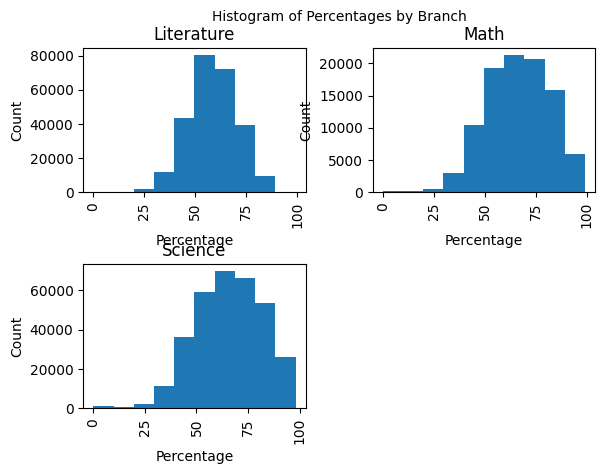

In [ ]:
# create a histogram of percentages grouped by branch (for ALL-DATA)
ALL_DATA.hist(column='Percentage', by='Eng_branch', bins=10)

# set axis labels and title
plt.xlabel('Percentage',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.suptitle('Histogram of Percentages by Branch',fontsize=10)

plt.subplot(2,2,1)
plt.xlabel('Percentage',fontsize=10)
plt.ylabel('Count',fontsize=10)

plt.subplot(2,2,2)
plt.xlabel('Percentage',fontsize=10)
plt.ylabel('Count',fontsize=10)

plt.subplot(2,2,3)
plt.xlabel('Percentage',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# show the plot
plt.show()

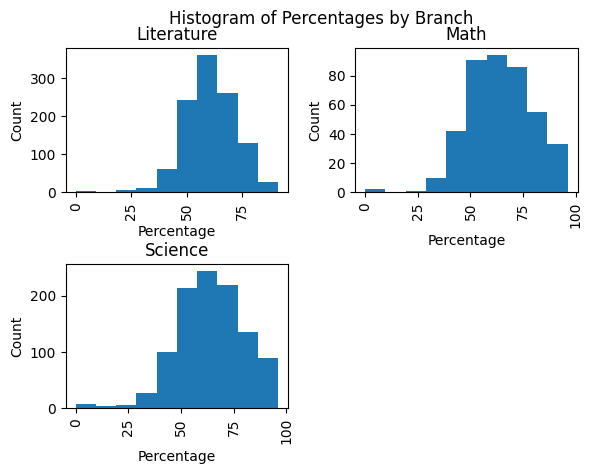

In [ ]:
# create a histogram of percentages grouped by branch (for Red sea only)
Red_sea_data.hist(column='Percentage', by='Eng_branch', bins=10)

# set axis labels and title
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.suptitle('Histogram of Percentages by Branch')
#Something
plt.subplot(2,2,1)
plt.xlabel('Percentage')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.xlabel('Percentage')
plt.ylabel('Count')

plt.subplot(2,2,3)
plt.xlabel('Percentage')
plt.ylabel('Count')
# show the plot

plt.show()

In [ ]:
# print the mean percentages for all branches
all_literature_mean = All_literature_students['Percentage'].mean()
all_science_mean = All_science_students['Percentage'].mean()
all_math_mean = All_math_students['Percentage'].mean()
RedSea_literature_mean = RedSea_literature_students['Percentage'].mean()
RedSea_science_mean = RedSea_science_students['Percentage'].mean()
RedSea_math_mean = RedSea_math_students['Percentage'].mean()
print(f"Literature branch mean = {all_literature_mean:.2f}")
print(f"Science branch mean = {all_science_mean:.2f}")
print(f"Math branch mean = {all_math_mean:.2f}")
print(f"RedSea Literature branch mean = {RedSea_literature_mean:.2f}")
print(f"RedSea Science branch mean = {RedSea_science_mean:.2f}")
print(f"RedSea Math branch mean = {RedSea_math_mean:.2f}")

Literature branch mean = 58.71
Science branch mean = 65.75
Math branch mean = 66.19
RedSea Literature branch mean = 60.32
RedSea Science branch mean = 63.98
RedSea Math branch mean = 64.24


In [ ]:
# print the mean for each column
Quantitative = ALL_DATA.drop(['city' , 'branch' , 'status' , 'gender'], axis = 1)
print(f"arabic mean: {Quantitative['arabic'].dropna().mean():.2f}")
print(f"Percentage mean: {Quantitative['Percentage'].dropna().mean():.2f}")
print(f"first_foreign_lang mean: {Quantitative['first_foreign_lang'].dropna().mean():.2f}")
print(f"pure_mathematics mean: {Quantitative['pure_mathematics'].dropna().mean():.2f}")
print(f"history mean: {Quantitative['history'].dropna().mean():.2f}")
print(f"geography mean: {Quantitative['geography'].dropna().mean():.2f}")
print(f"philosophy mean: {Quantitative['philosophy'].dropna().mean():.2f}")
print(f"psychology mean: {Quantitative['psychology'].dropna().mean():.2f}")
print(f"chemistry mean: {Quantitative['chemistry'].dropna().mean():.2f}")
print(f"biology mean: {Quantitative['biology'].dropna().mean():.2f}")
print(f"geology mean: {Quantitative['geology'].dropna().mean():.2f}")
print(f"applied_math mean: {Quantitative['applied_math'].dropna().mean():.2f}")
print(f"physics mean: {Quantitative['physics'].dropna().mean():.2f}")
gender_counts = ALL_DATA['gender'].value_counts()
proportions = gender_counts / len(ALL_DATA['gender'])
print(proportions)

arabic mean: 50.06
Percentage mean: 63.14
first_foreign_lang mean: 32.91
pure_mathematics mean: 37.21
history mean: 32.77
geography mean: 33.13
philosophy mean: 38.10
psychology mean: 37.72
chemistry mean: 38.69
biology mean: 35.98
geology mean: 43.47
applied_math mean: 39.45
physics mean: 35.59
F    0.553927
M    0.446069
Name: gender, dtype: float64


In [ ]:
#We want to test whether the average of score percentage in red sea across all branches is different than the national average of Egypt.
# null hypothesis -> u = u(d)
# alternative hypothesis -> u != u(d)
#Our significance level (alpha) is 0.05
#Hypothesis testing for each branch:
all_literature_stddev = np.std(ALL_DATA['Percentage'], ddof=0)
all_science_stddev = np.std(ALL_DATA['Percentage'], ddof=0)
all_math_stddev = np.std(ALL_DATA['Percentage'], ddof=0)
z_stat_literature = (RedSea_literature_students['Percentage'].mean() - all_literature_mean) / (all_literature_stddev / (RedSea_literature_students['Percentage'].count() ** 0.5))
p_val_literature = norm.sf(abs(z_stat_literature))*2

z_stat_science = (RedSea_science_students['Percentage'].mean() - all_science_mean) / (all_science_stddev / (RedSea_science_students['Percentage'].count() ** 0.5))
p_val_science = norm.sf(abs(z_stat_science))*2

z_stat_math = (RedSea_math_students['Percentage'].mean() - all_math_mean) / (all_math_stddev / (RedSea_math_students['Percentage'].count() ** 0.5))
p_val_math = norm.sf(abs(z_stat_math))*2
print('z-statistic:', z_stat_literature)
print('p-value:', p_val_literature)
print('z-statistic:', z_stat_science)
print('p-value:', p_val_science)
print('z-statistic:', z_stat_math)
print('p-value:', p_val_math)

z-statistic: 3.615527503527162
p-value: 0.0002997366481565665
z-statistic: -3.841748544525144
p-value: 0.000122160951004429
z-statistic: -2.6636145504293314
p-value: 0.0077306086329257786


Creating a version of the dataframe that fills in nan values.

In [ ]:
mean_grades = ALL_DATA.groupby('Eng_gov')['Percentage'].mean().reset_index()
mean_grades = mean_grades.rename(columns={'Eng_gov': 'ADM1_EN'})

Filled_data = pd.DataFrame()
Filled_data['second_foreign_lang_filled'] = ALL_DATA['second_foreign_lang'].fillna(0)
Filled_data['arabic_filled'] = ALL_DATA['arabic'].fillna(0)
Filled_data['first_foreign_lang_filled'] = ALL_DATA['first_foreign_lang'].fillna(0)
Filled_data['pure_mathematics_filled'] =  All_math_students['pure_mathematics'].fillna(0)
Filled_data['applied_math_filled'] = All_math_students['applied_math'].fillna(0)
Filled_data['physics_filled'] = ALL_DATA['physics'].fillna(0)
Filled_data['chemistry_filled'] = ALL_DATA['chemistry'].fillna(0)
Filled_data['geology_filled'] = All_science_students['geology'].fillna(0)
Filled_data['biology_filled'] = All_science_students['biology'].fillna(0)
Filled_data['psychology_filled'] = All_literature_students['psychology'].fillna(0)
Filled_data['philosophy_filled'] = All_literature_students['philosophy'].fillna(0)
Filled_data['history_filled'] = All_literature_students['history'].fillna(0)
Filled_data['geography_filled'] = All_literature_students['geography'].fillna(0)
ALL_DATA['language'] = Filled_data['arabic_filled'] + Filled_data['first_foreign_lang_filled'] + Filled_data['second_foreign_lang_filled']
ALL_DATA['language'] = ALL_DATA['language']*100 / 170
ALL_DATA['general_science'] = Filled_data['physics_filled'] + Filled_data['chemistry_filled']
ALL_DATA['general_science'] = ALL_DATA['general_science']*100 / 120
All_math_students['math'] = Filled_data['applied_math_filled'] + Filled_data['pure_mathematics_filled']
All_math_students['math'] = All_math_students['math']*100 / 160
All_science_students['science'] = Filled_data['geology_filled'] + Filled_data['biology_filled']
All_science_students['science'] = All_science_students['science']*100 / 120
All_literature_students['literature'] = Filled_data['psychology_filled'] + Filled_data['philosophy_filled'] + Filled_data['history_filled'] + Filled_data['geography_filled']
All_literature_students['literature'] = All_literature_students['literature']*100 / 240

mean_grades_language = ALL_DATA.groupby('Eng_gov')['language'].mean().reset_index()
mean_grades_language = mean_grades_language.rename(columns={'Eng_gov': 'ADM1_EN'})
mean_grades_literature = All_literature_students.groupby('Eng_gov')['literature'].mean().reset_index()
mean_grades_literature = mean_grades_literature.rename(columns={'Eng_gov': 'ADM1_EN'})
mean_grades_general = ALL_DATA.groupby('Eng_gov')['general_science'].mean().reset_index()
mean_grades_general = mean_grades_general.rename(columns={'Eng_gov': 'ADM1_EN'})
mean_grades_math = All_math_students.groupby('Eng_gov')['math'].mean().reset_index()
mean_grades_math = mean_grades_math.rename(columns={'Eng_gov': 'ADM1_EN'})
mean_grades_science = All_science_students.groupby('Eng_gov')['science'].mean().reset_index()
mean_grades_science = mean_grades_science.rename(columns={'Eng_gov': 'ADM1_EN'})

<ipython-input-71-9134fd0bd52d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_math_students['math'] = Filled_data['applied_math_filled'] + Filled_data['pure_mathematics_filled']
<ipython-input-71-9134fd0bd52d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_math_students['math'] = All_math_students['math']*100 / 160
<ipython-input-71-9134fd0bd52d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
# Create a zip file of the folder you want to upload
folder_name = 'myfolder'
!zip -r {folder_name}.zip {folder_name}
# Extract the contents of the zip file
for filename in shape_file.keys():
  if filename.endswith('.zip'):
    # Check if the directory already exists and delete it
    if os.path.exists(folder_name):
      !rm -r {folder_name}
    # Extract the contents of the zip file
    os.makedirs(folder_name)
    !unzip -qq {filename} -d {folder_name}
governorates = gpd.read_file(folder_name)

updating: myfolder/ (stored 0%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.shx (deflated 17%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.dbf (deflated 91%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.prj (deflated 17%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.shp (deflated 28%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.shp.xml (deflated 87%)
updating: myfolder/egy_admbnda_adm1_capmas_20170421.cpg (stored 0%)


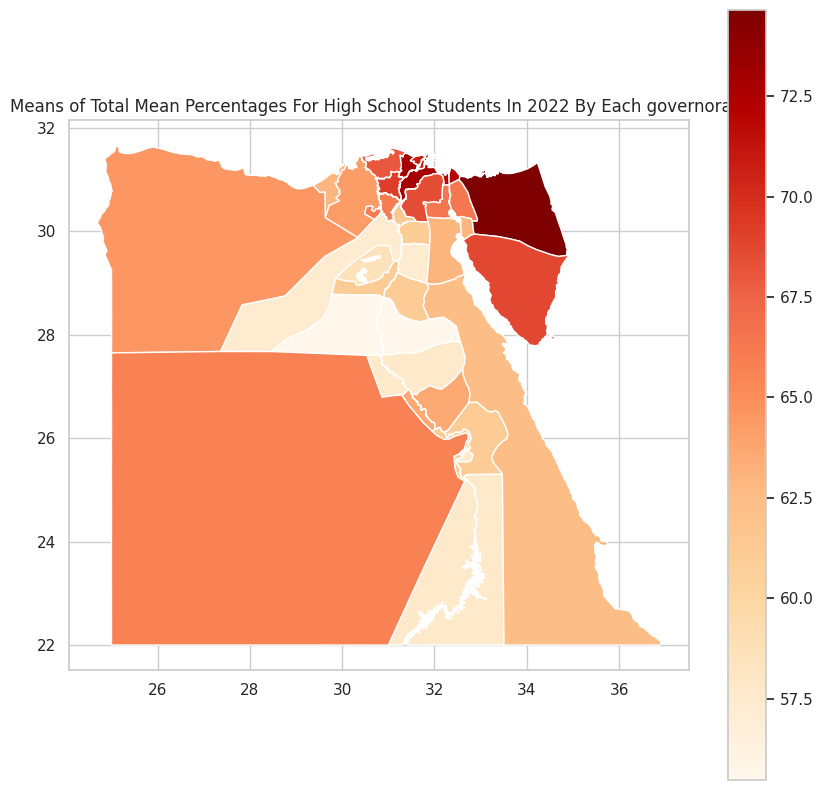

In [ ]:
# Heat map for Egypt (mean of percentage)
# Merge the governorate boundaries with the means data
governorates = governorates.merge(mean_grades, on='ADM1_EN')
# Plot the governorate boundaries with the means as a choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='Percentage', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['Percentage']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of Total Mean Percentages For High School Students In 2022 By Each governorate')
plt.show()

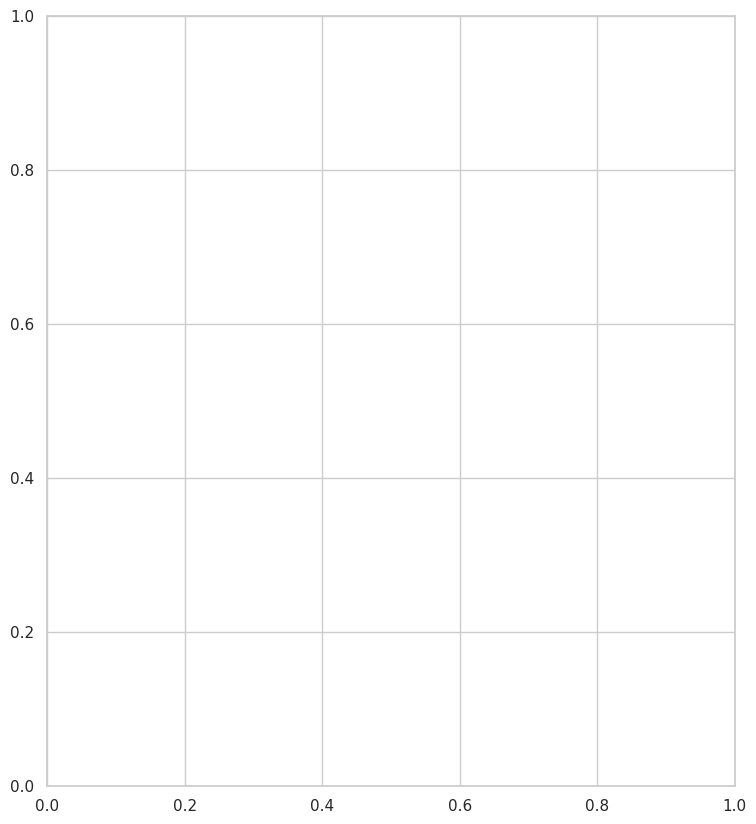

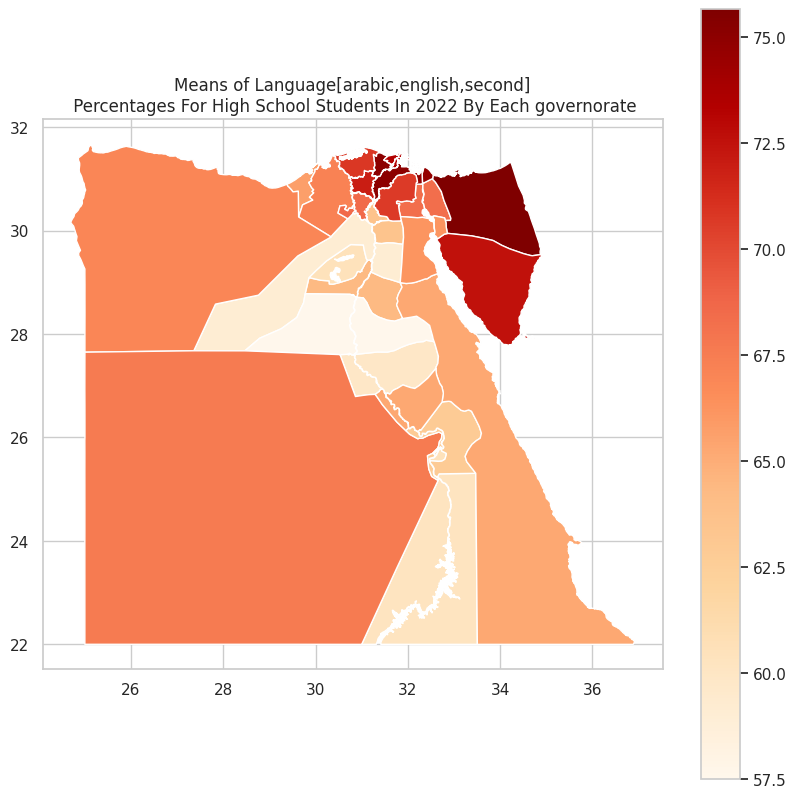

In [ ]:
governorates = governorates.merge(mean_grades_language, on='ADM1_EN')
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='language', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['language']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of Language[arabic,english,second]\n Percentages For High School Students In 2022 By Each governorate')
plt.show()

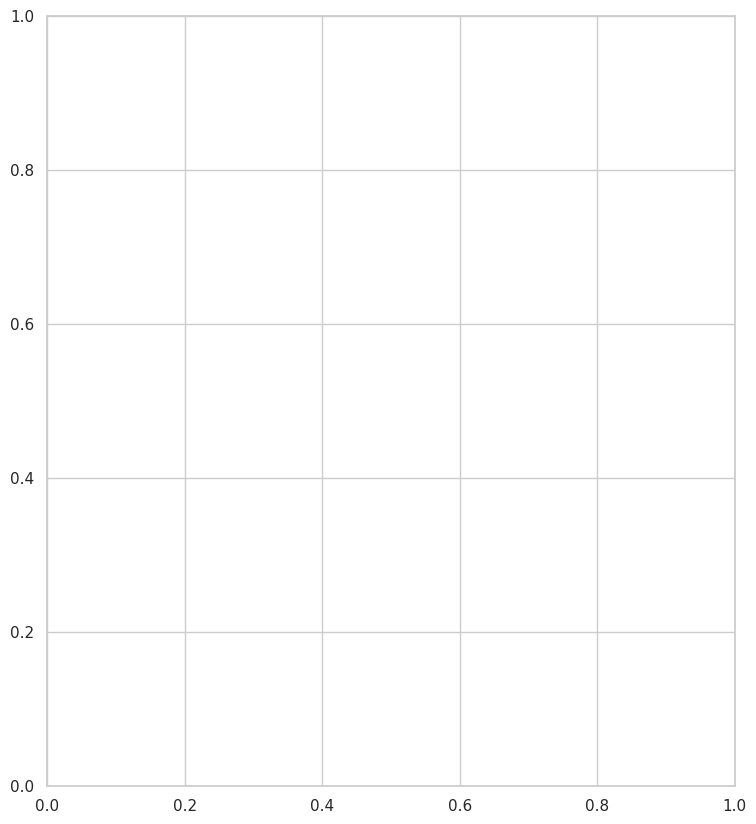

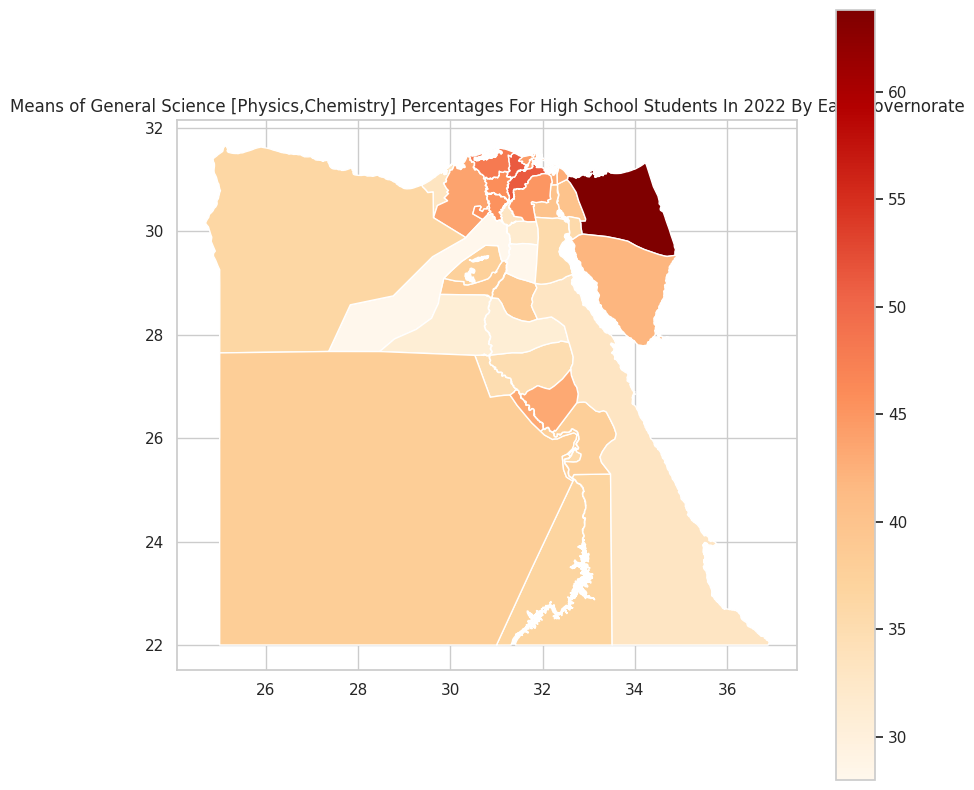

In [ ]:
governorates = governorates.merge(mean_grades_general, on='ADM1_EN')
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='general_science', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['general_science']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of General Science [Physics,Chemistry]\n Percentages For High School Students In 2022 By Each governorate')
plt.show()

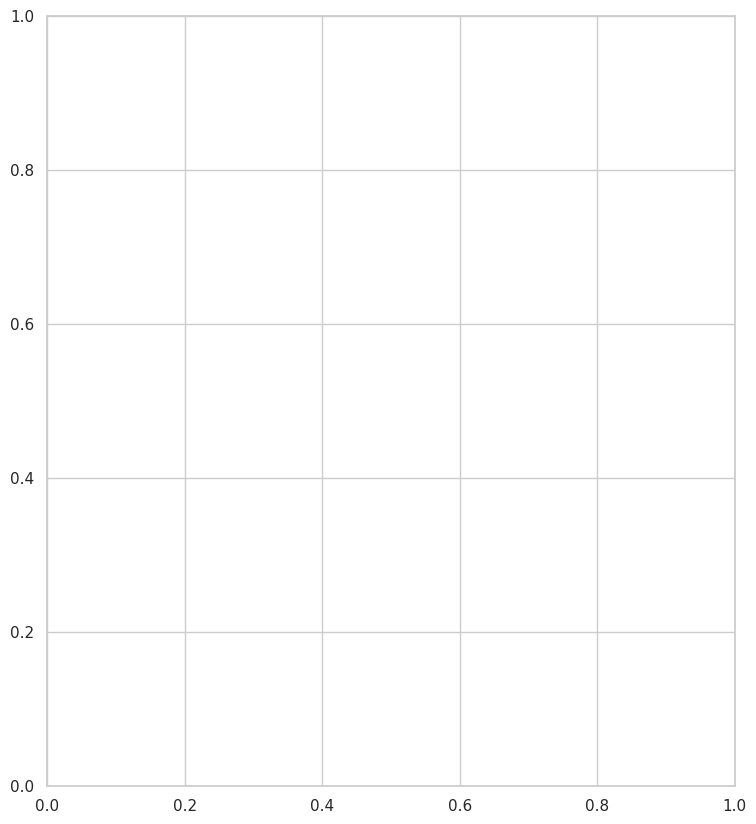

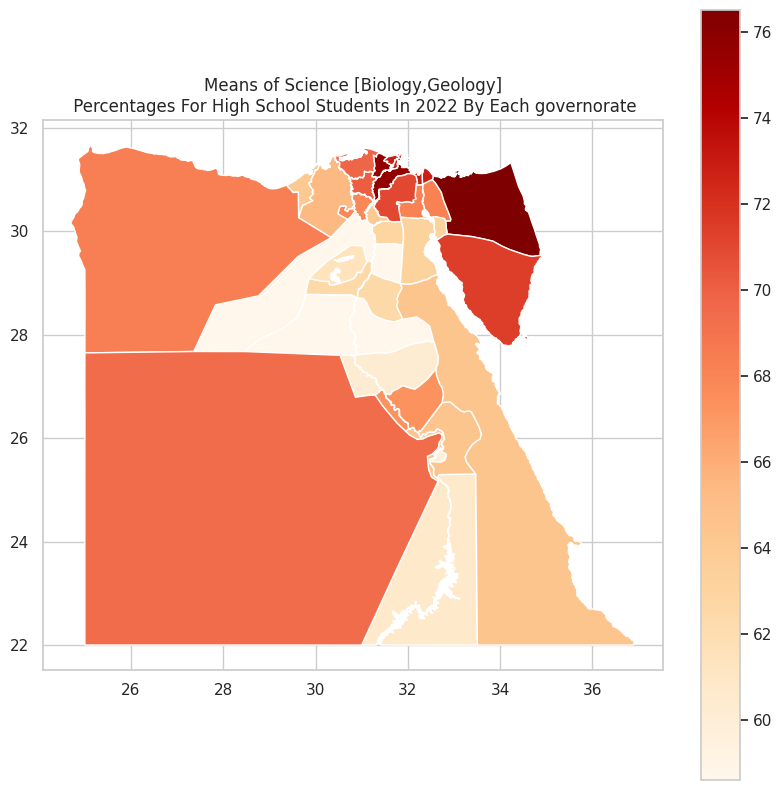

In [ ]:
governorates = governorates.merge(mean_grades_science, on='ADM1_EN')
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='science', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['science']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of Science [Biology,Geology]\n Percentages For High School Students In 2022 By Each governorate')
plt.show()

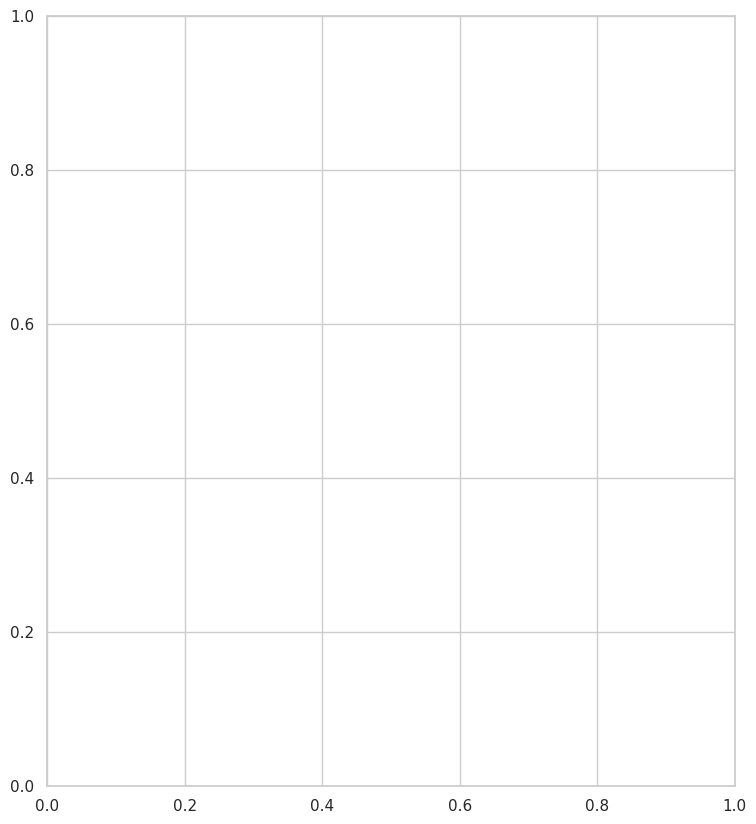

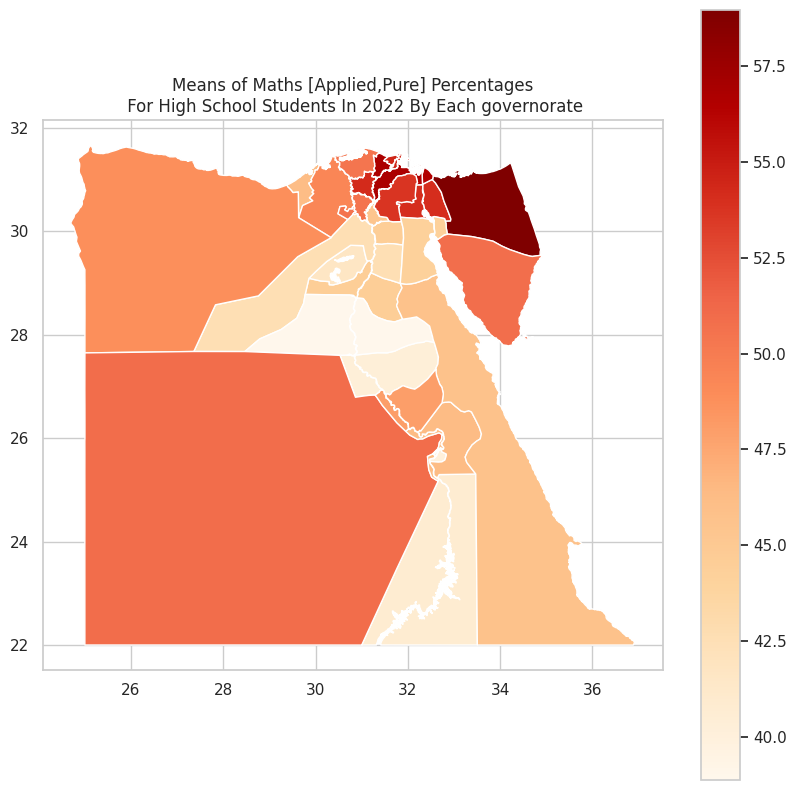

In [ ]:
governorates = governorates.merge(mean_grades_math, on='ADM1_EN')
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='math', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['math']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of Maths [Applied,Pure] Percentages\n For High School Students In 2022 By Each governorate')
plt.show()

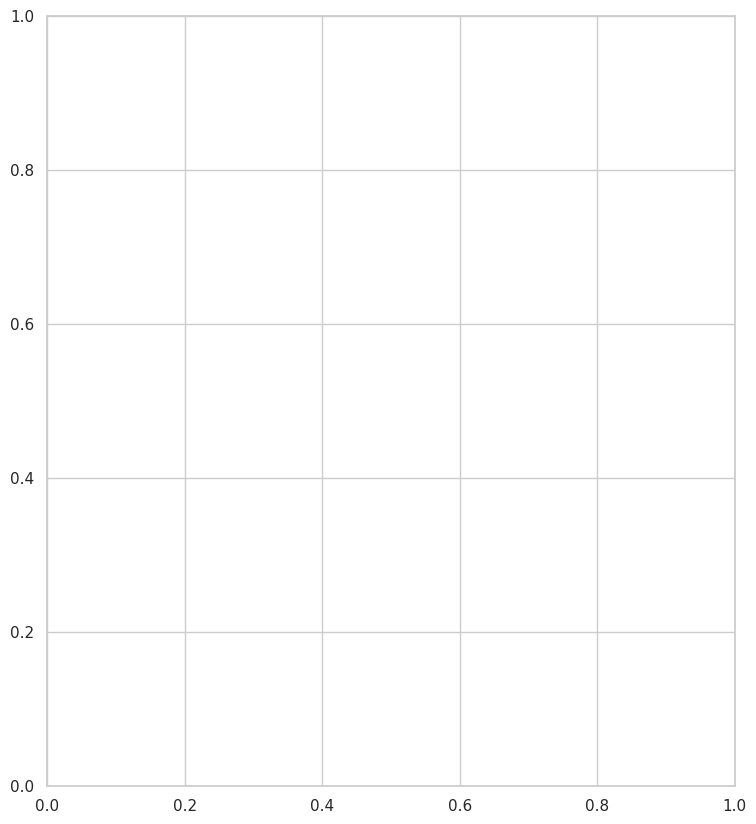

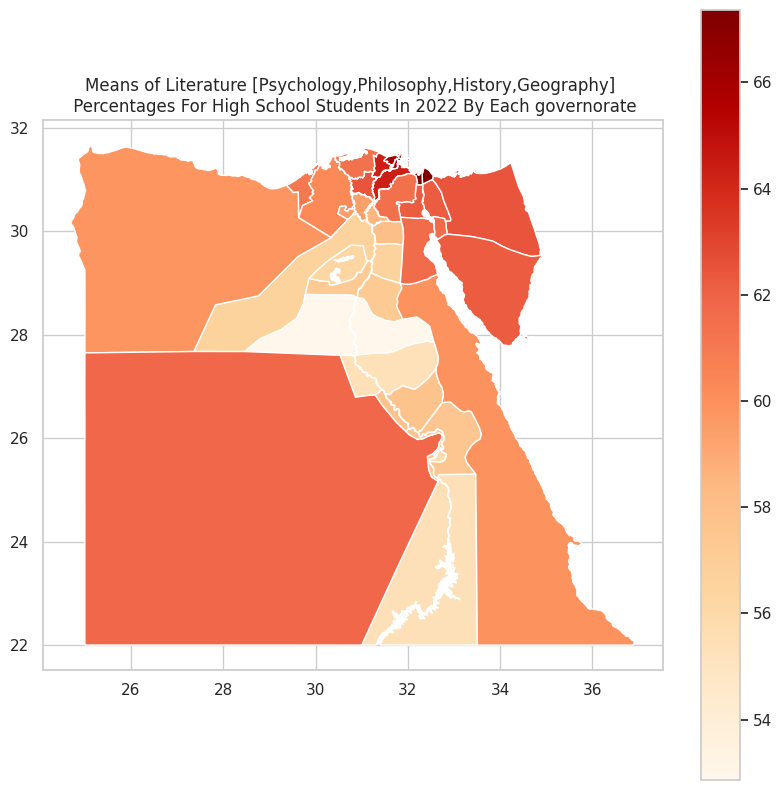

In [ ]:
governorates = governorates.merge(mean_grades_literature, on='ADM1_EN')
fig, ax = plt.subplots(figsize=(10, 10))
governorates.plot(column='literature', cmap='OrRd', ax=ax, legend=True)
for idx, row in governorates.iterrows():
    mean_val = row['literature']
    governorate_name = row['ADM1_EN']
    centroid = row['geometry'].centroid
ax.set_title('Means of Literature [Psychology,Philosophy,History,Geography] \n Percentages For High School Students In 2022 By Each governorate')
plt.show()

In [ ]:
print(ALL_DATA)

          city      branch  Percentage    status  arabic  first_foreign_lang  \
0       الجيزة  Literature       87.80      ناجح    61.0                27.0   
1       الجيزة     Science       57.32      ناجح    47.0                25.0   
2       الجيزة  Literature       83.41      ناجح    70.0                38.0   
3       الجيزة  Literature       53.17      ناجح    57.0                27.0   
4       الجيزة        Math       51.46  دور ثاني    56.0                25.0   
...        ...         ...         ...       ...     ...                 ...   
682343   سوهاج  Literature       54.15  دور ثاني    40.0                39.0   
682344   سوهاج  Literature       62.93  دور ثاني    42.0                35.0   
682345   سوهاج     Science       70.98      ناجح    40.0                46.0   
682346   سوهاج     Science       85.49      ناجح    59.0                47.0   
682347   سوهاج        Math       69.27      ناجح    46.0                47.0   

        second_foreign_lang  pure_mathe

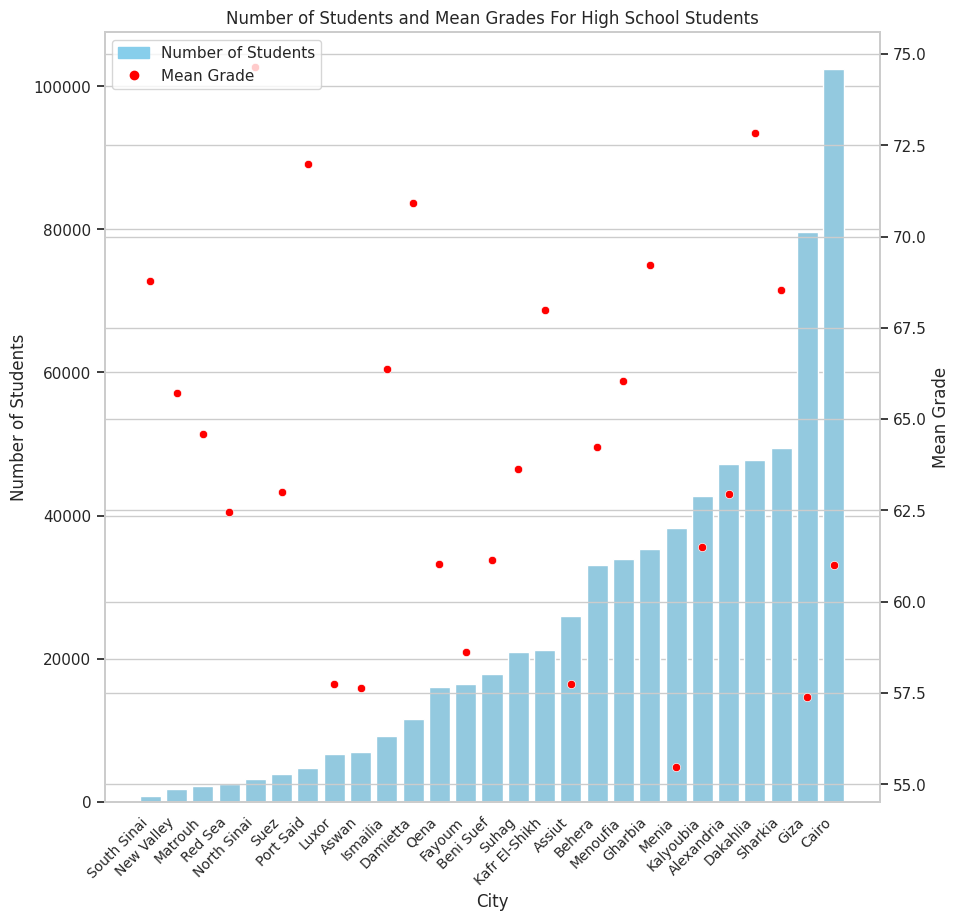

In [ ]:
# Assuming ALL_DATA is your original DataFrame
grouped = ALL_DATA.groupby('Eng_gov')

# Calculate the number of students and mean grade per city
summary = grouped['Percentage'].agg(['count', 'mean']).reset_index()
summary.columns = ['Eng_gov', 'number_of_students', 'mean_grade']

# Sort the summary DataFrame by number_of_students in ascending order
summary = summary.sort_values('number_of_students', ascending=True)

# Create a new figure
fig, ax1 = plt.subplots(figsize=(10, 10))

# Plot the number of students per city
sns.barplot(data=summary, x='Eng_gov', y='number_of_students', ax=ax1, color='skyblue')
ax1.set_ylabel('Number of Students')

# Create a second y-axis for the mean grades
ax2 = ax1.twinx()

# Plot the mean grade per city
sns.scatterplot(data=summary, x='Eng_gov', y='mean_grade', ax=ax2, color='red')
ax2.set_ylabel('Mean Grade')

# Set plot details
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax1.set_xlabel('City')
ax1.set_title('Number of Students and Mean Grades For High School Students')

# Create a legend
handles = [plt.Rectangle((0, 0), 1, 1, color='skyblue'), plt.Line2D([], [], marker='o', color='red', linestyle='None')]
labels = ['Number of Students', 'Mean Grade']
plt.legend(handles, labels, loc='upper left')

plt.show()

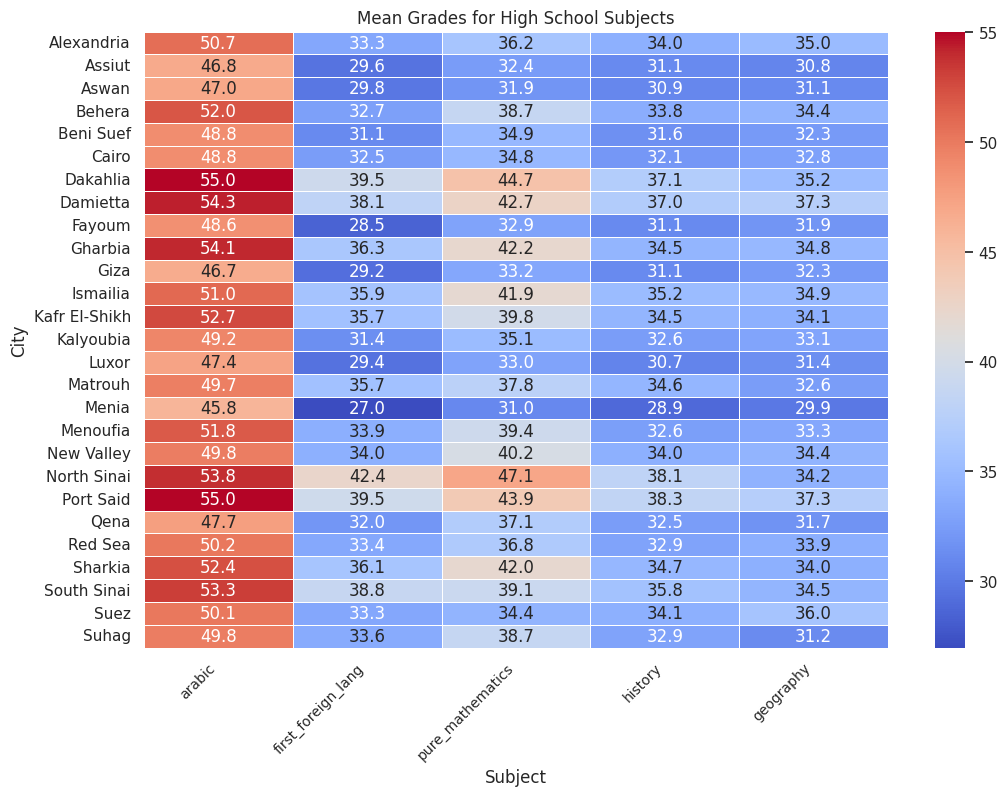

In [ ]:

# Assuming ALL_DATA is your original DataFrame
grouped = ALL_DATA.groupby('Eng_gov')

# Calculate the mean grade per city and subject
mean_grade = grouped[['arabic', 'first_foreign_lang', 'pure_mathematics', 'history', 'geography']].mean()

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap of mean grades per city and subject
sns.heatmap(mean_grade, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5, ax=ax)

# Set plot details
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_title('Mean Grades for High School Subjects')
ax.set_xlabel('Subject')
ax.set_ylabel('City')

plt.show()

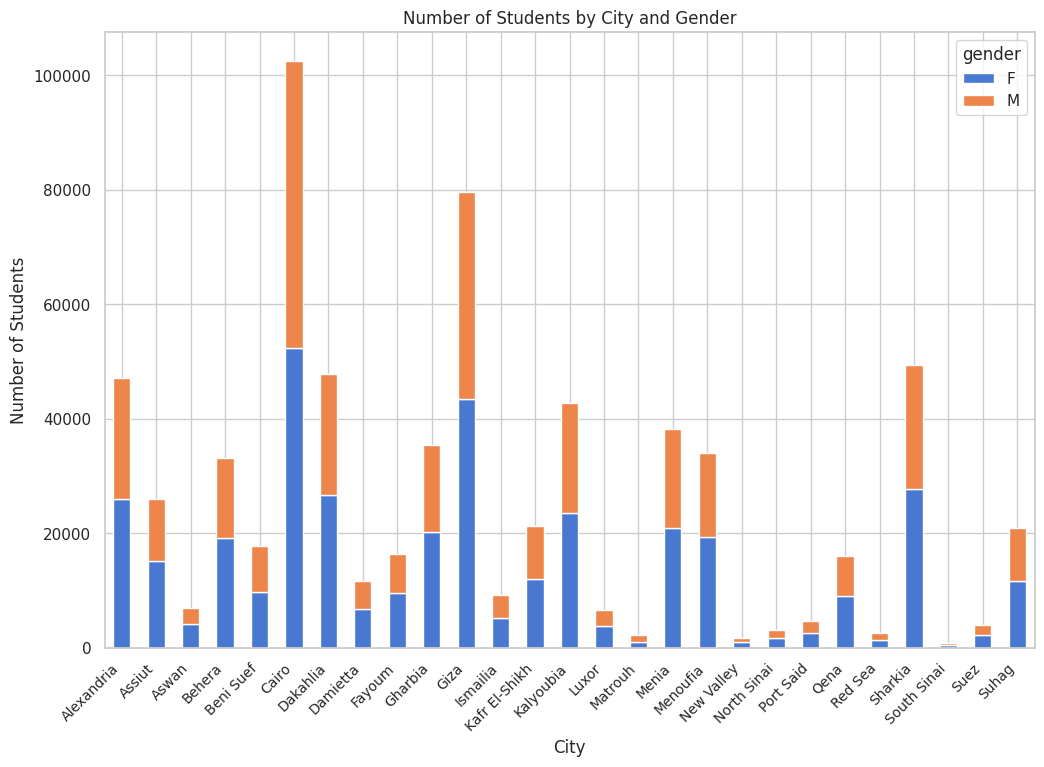

In [ ]:

# Assuming ALL_DATA is your original DataFrame
grouped = ALL_DATA.groupby('Eng_gov')

# Calculate the count of students per city and gender
count_gender = grouped['gender'].value_counts().unstack().fillna(0)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create a stacked bar plot of student counts per city and gender
count_gender.plot(kind='bar', stacked=True, ax=ax)

# Set plot details
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_title('Number of Students by City and Gender')
ax.set_xlabel('City')
ax.set_ylabel('Number of Students')

plt.show()

In [ ]:
# group the data by governorate and calculate the mean grades for each subject
grouped = ALL_DATA.groupby(['Eng_gov']).mean()
transposed = grouped.T

<ipython-input-220-73ed20e3fb8f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby(['Eng_gov']).mean()


<ipython-input-170-7d7866062f04>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby(['Eng_gov']).mean()


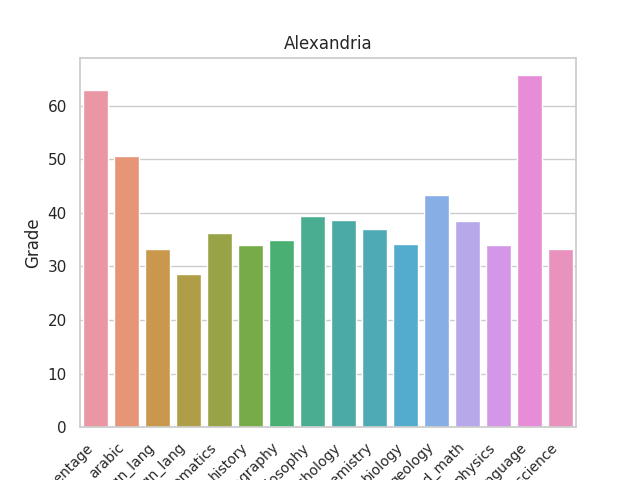

In [ ]:
import imageio.v2 as iio
from PIL import Image
from IPython.display import Image as ImageDisplay

grouped = ALL_DATA.groupby(['Eng_gov']).mean()
transposed = grouped.T

images = []

for gov in grouped.index:
    data = grouped.loc[gov].reset_index()
    data.columns = ['Subject', 'Grade']
    data = data.dropna()

    fig, ax = plt.subplots()
    sns.barplot(data=data, x='Subject', y='Grade', ax=ax)
    ax.set(title=gov)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=10)

    # Save the plot to a file
    fig.savefig(f"{gov}.png")
    plt.close(fig)  # close the figure

    # Append the image file to the list of images
    images.append(iio.imread(f"{gov}.png"))

# Create a GIF from the list of images
iio.mimsave('animated_barplot.gif', images, duration=1)  # duration is the time spent on each image (in seconds)

# Now remove all .png files we don't need anymore
for gov in grouped.index:
    if os.path.exists(f"{gov}.png"):
        os.remove(f"{gov}.png")

# Display the GIF in Jupyter Notebook
ImageDisplay(filename="animated_barplot.gif")

In [ ]:
mean_grades.head

<bound method NDFrame.head of           ADM1_EN  Percentage
0      Alexandria   62.947438
1          Assiut   57.755036
2           Aswan   57.646075
3          Behera   64.247124
4       Beni Suef   61.149361
5           Cairo   60.998889
6        Dakahlia   72.844990
7        Damietta   70.911913
8          Fayoum   58.616815
9         Gharbia   69.214650
10           Giza   57.400036
11       Ismailia   66.371450
12  Kafr El-Shikh   67.991388
13      Kalyoubia   61.500517
14          Luxor   57.753805
15        Matrouh   64.597190
16          Menia   55.471709
17       Menoufia   66.048633
18     New Valley   65.727197
19    North Sinai   74.644571
20      Port Said   71.974757
21           Qena   61.034728
22        Red Sea   62.446398
23        Sharkia   68.536738
24    South Sinai   68.786480
25           Suez   63.016053
26          Suhag   63.619754>

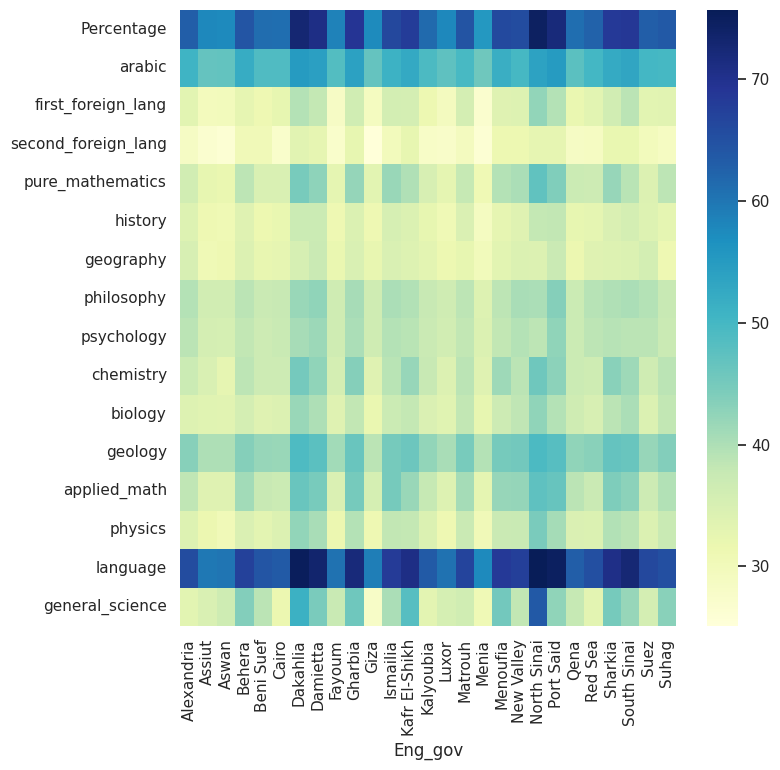

In [ ]:
# the plot isn't useful
plt.figure(figsize = (8,8))
sns.heatmap(data=transposed, cmap='YlGnBu',)
plt.show()

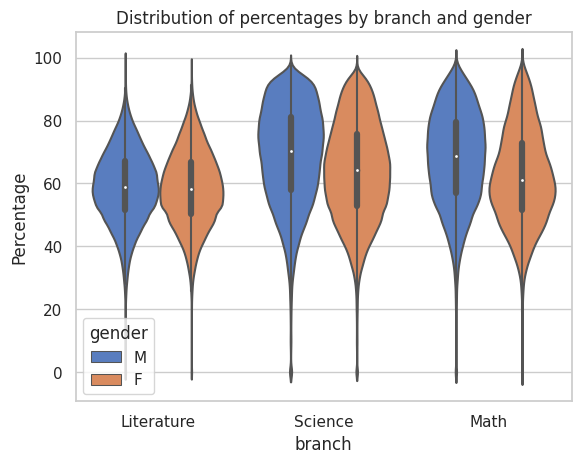

In [ ]:
# map each branch to its equivelant english branch and then replace the Arabic names with the English names
branch_map = {
    'علمي علوم': 'Science',
    'علمي رياضة': 'Math',
    'أدبي': 'Literature'
}
ALL_DATA['branch'] = ALL_DATA['branch'].replace(branch_map)
# create a violin plot of the percentage grouped by gender for each branch
sns.violinplot(x='branch', y='Percentage', hue='gender', data=ALL_DATA)
plt.title('Distribution of percentages by branch and gender')
plt.show()

In [ ]:
# map each governrate to its region or group
governorate_groups = {
    'Alexandria': 'Delta',
    'Behera': 'Delta',
    'Dakahlia': 'Delta',
    'Damietta': 'Delta',
    'Gharbia': 'Delta',
    'Kafr El-Shikh': 'Delta',
    'Menoufia': 'Delta',
    'Port Said': 'Canal',
    'Ismailia': 'Canal',
    'Suez': 'Canal',
    'Cairo': 'Great Cairo',
    'Giza': 'Great Cairo',
    'Kalyoubia': 'Great Cairo',
    'Fayoum': 'Upper Egypt',
    'Assiut': 'Upper Egypt',
    'Beni Suef': 'Upper Egypt',
    'Menia': 'Upper Egypt',
    'New Valley': 'Western Desert',
    'Matrouh': 'North Coast',
    'Red Sea': 'Red Sea',
    'North Sinai': 'Sinai',
    'South Sinai': 'Sinai',
    'Sharkia': 'Delta',
    'Suhag': 'Upper Egypt',
    'Luxor': 'Upper Egypt',
    'Aswan': 'Upper Egypt'
}
# Map the governorates to their corresponding group
ALL_DATA['Group'] = ALL_DATA['Eng_gov'].map(governorate_groups)
# Group the data by group and calculate the mean grade for each subject
grouped = ALL_DATA.groupby('Group').mean()

<ipython-input-135-821821023273>:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby('Group').mean()


<ipython-input-136-6832ad946010>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby('Group').mean().reset_index()


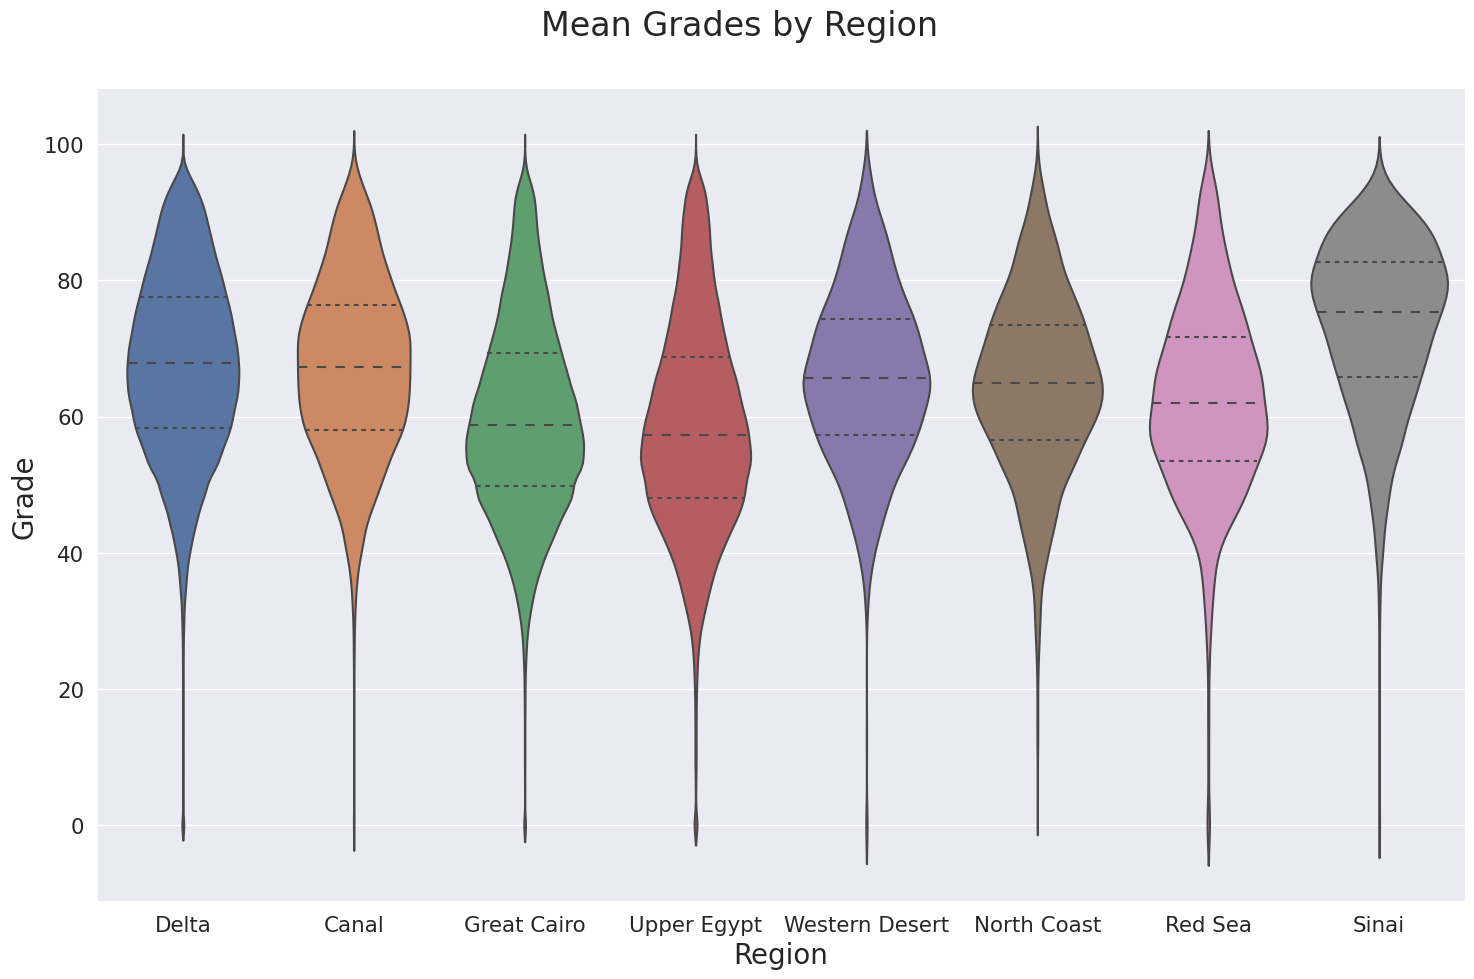

In [ ]:
grouped = ALL_DATA.groupby('Group').mean().reset_index()
# Define the plot style
sns.set(style='darkgrid', font_scale=1.4)
# Create a violin plot of the mean grades for each group
g = sns.catplot(x='Group', y='Percentage', data=ALL_DATA, kind='violin', inner='quartile',
                order=['Delta', 'Canal', 'Great Cairo', 'Upper Egypt', 'Western Desert',
                       'North Coast', 'Red Sea', 'Sinai'], height=10, aspect=1.5)
# Set the axis labels and titles
g.set_axis_labels('Region', 'Grade', fontsize=20)
g.fig.suptitle('Mean Grades by Region', fontsize=24)
# Adjust the spacing between the plots
plt.subplots_adjust(top=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize = 12)
# Show the plot
plt.show()

In [ ]:
print(grouped)

            Group  Percentage     arabic  first_foreign_lang  \
0           Canal   67.110140  51.878315           36.310687   
1           Delta   67.662456  52.751381           35.612737   
2     Great Cairo   59.819837  48.158507           31.113233   
3     North Coast   64.597190  49.684428           35.689139   
4         Red Sea   62.446398  50.161030           33.387598   
5           Sinai   73.400181  53.718984           41.599776   
6     Upper Egypt   58.579121  47.539992           29.539885   
7  Western Desert   65.727197  49.835489           34.044151   

   second_foreign_lang  pure_mathematics    history  geography  philosophy  \
0            30.470869         40.458721  35.773432  35.782926   40.888848   
1            31.562806         40.585873  34.667754  34.631480   40.014679   
2            26.665659         34.406038  31.790071  32.672571   37.248029   
3            29.317011         37.765101  34.631753  32.563117   38.728070   
4            28.718922         36

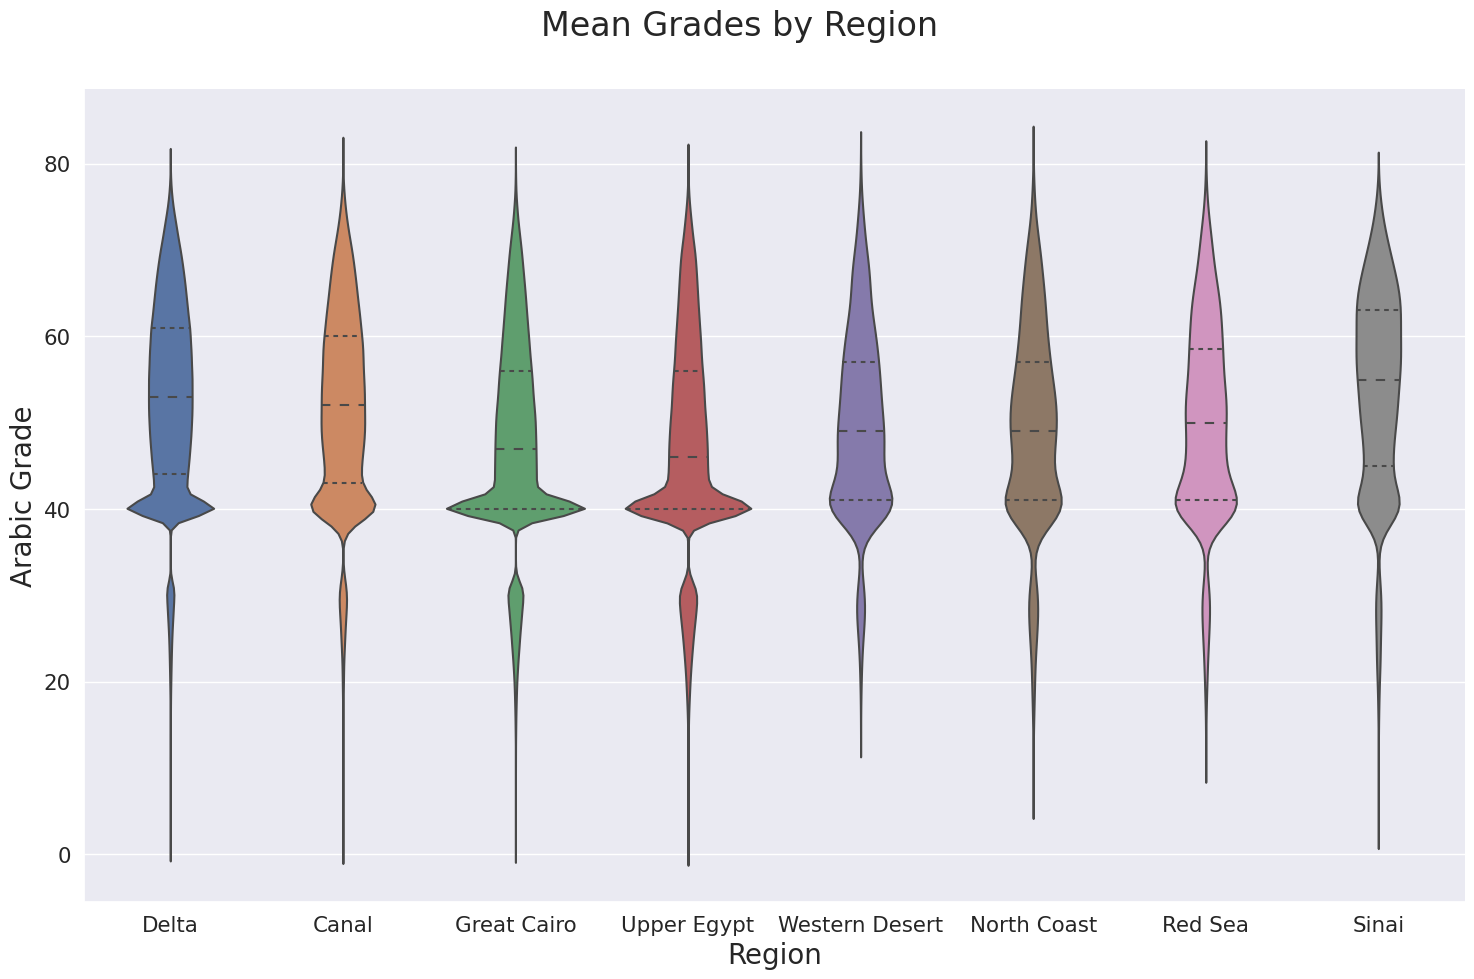

In [ ]:
# Define the plot style
sns.set(style='darkgrid', font_scale=1.4)
# Create a violin plot of the mean grades for each group
g = sns.catplot(x='Group', y='arabic', data=ALL_DATA, kind='violin', inner='quartile',
                order=['Delta', 'Canal', 'Great Cairo', 'Upper Egypt', 'Western Desert',
                       'North Coast', 'Red Sea', 'Sinai'], height=10, aspect=1.5)
# Set the axis labels and titles
g.set_axis_labels('Region', 'Arabic Grade', fontsize=20)
g.fig.suptitle('Mean Grades by Region', fontsize=24)
# Adjust the spacing between the plots
plt.subplots_adjust(top=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize = 12)
# Show the plot
plt.show()

<ipython-input-139-1d1dcb91b27c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby(['Group']).mean()


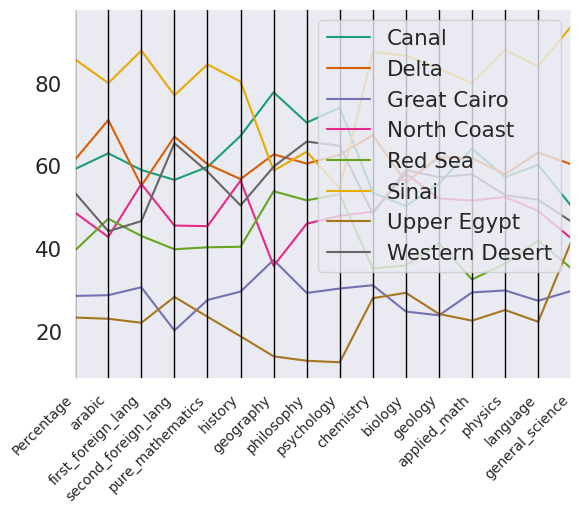

In [ ]:
grouped = ALL_DATA.groupby(['Group']).mean()
normalized = (grouped - grouped.mean()) / grouped.std() * 20 + 50
# Create a parallel coordinates plot of grades grouped by the region for each subject
fig, ax = plt.subplots()
parallel_coordinates(
    normalized.reset_index(),  # The normalized data, with the governorates as rows and the subjects as columns
    'Group',  # The column containing the governorate names
    colormap='Dark2',  # The colormap to use for the plot
    ax=ax  # Pass the axis object to the function to plot on the same figure
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=10)  # Rotate the x-tick labels and align them to the right
plt.show()

In [ ]:
# create group column in all branches
All_literature_students['Group'] = All_literature_students['Eng_gov'].map(governorate_groups)
All_math_students['Group'] = All_math_students['Eng_gov'].map(governorate_groups)
All_science_students['Group'] = All_science_students['Eng_gov'].map(governorate_groups)

<ipython-input-140-5bee8cdbdef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_literature_students['Group'] = All_literature_students['Eng_gov'].map(governorate_groups)
<ipython-input-140-5bee8cdbdef8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_math_students['Group'] = All_math_students['Eng_gov'].map(governorate_groups)
<ipython-input-140-5bee8cdbdef8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

<ipython-input-141-1842eea8aacb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = All_literature_students.groupby(['Group']).mean().reset_index()


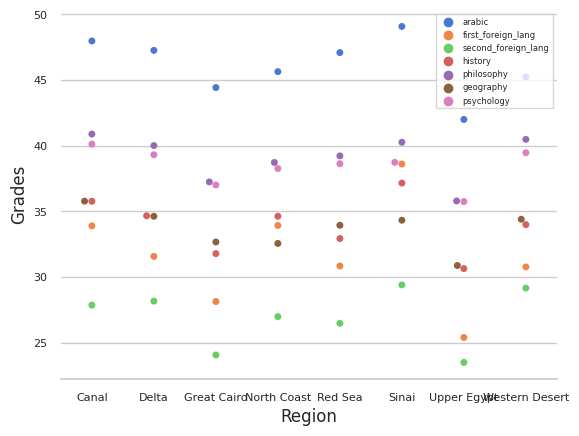

In [ ]:
grouped = All_literature_students.groupby(['Group']).mean().reset_index()
melted = pd.melt(grouped.reset_index(), id_vars=['Group'], value_vars = ['arabic' , 'first_foreign_lang' , 'second_foreign_lang' , 'history' , 'philosophy' , 'geography' , 'psychology'])
# Create a swarm plot of the grades grouped by the regions and subjects (literature students)
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Group", y="value", hue="variable", data=melted, size=5)
# test the following
plt.legend(fontsize=6, loc = 'upper right', title="Subject")
plt.xlabel("Region")
plt.ylabel("Grades")
# Show the plot
plt.legend(fontsize=6, loc = 'best')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine(left=True)
plt.show()

<ipython-input-142-7fd68103fee4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = All_math_students.groupby(['Group']).mean().reset_index()


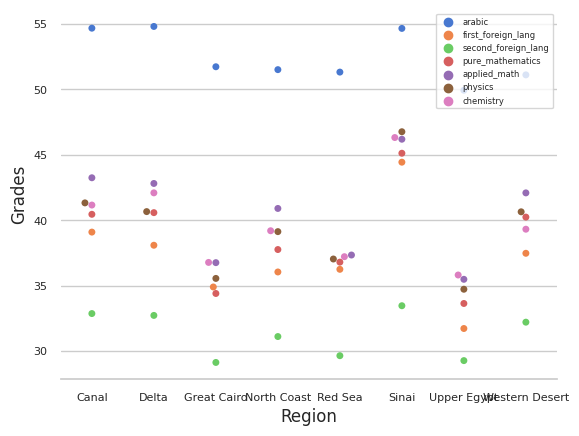

In [ ]:
grouped = All_math_students.groupby(['Group']).mean().reset_index()
melted = pd.melt(grouped.reset_index(), id_vars=['Group'], value_vars = ['arabic' , 'first_foreign_lang' , 'second_foreign_lang' , 'pure_mathematics','applied_math' , 'physics' ,'chemistry'])
# Create a swarm plot of the grades grouped by the regions and subjects (math students)
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Group", y="value", hue="variable", data=melted, size=5)
# test the following
plt.legend(fontsize=6, loc = 'upper right', title="Subject")
plt.xlabel("Region")
plt.ylabel("Grades")
# Show the plot
plt.legend(fontsize=6, loc = 'best')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine(left=True)
plt.show()

<ipython-input-143-5d94f65eda49>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = All_science_students.groupby(['Group']).mean().reset_index()


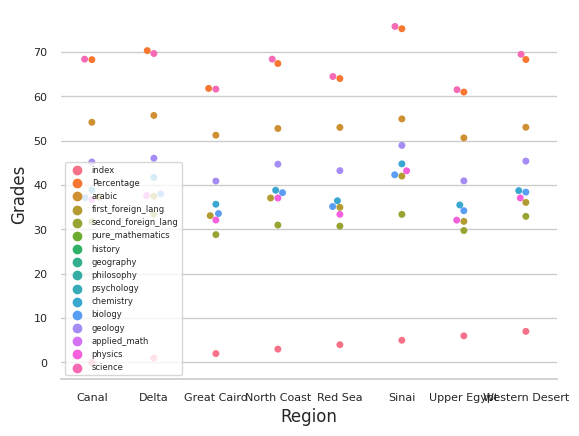

In [ ]:
grouped = All_science_students.groupby(['Group']).mean().reset_index()
melted = pd.melt(grouped.reset_index(), id_vars=['Group'])
# Create a swarm plot of the grades grouped by the regions and subjects (science students)
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Group", y="value", hue="variable", data=melted, size=5)
# test the following
plt.legend(fontsize=6, loc = 'upper right', title="Subject")
plt.xlabel("Region")
plt.ylabel("Grades")
# Show the plot
plt.legend(fontsize=6, loc = 'best')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine(left=True)
plt.show()

<ipython-input-144-691bd200997a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ALL_DATA.groupby(['Eng_branch']).mean()


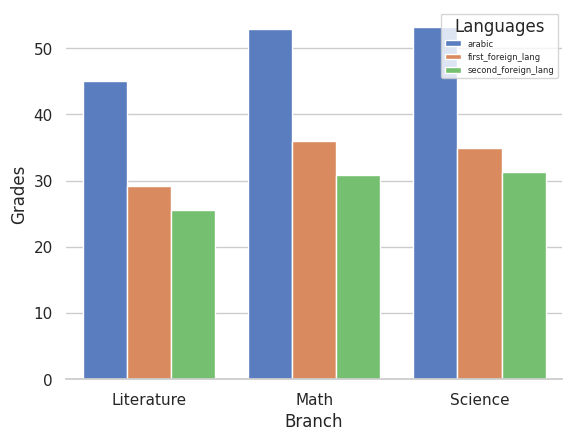

In [ ]:
grouped = ALL_DATA.groupby(['Eng_branch']).mean()

# Reset the index of the grouped DataFrame to create a long-form dataset suitable for plotting with seaborn
melted = grouped.reset_index().melt(id_vars=['Eng_branch'], value_vars = ['arabic' , 'first_foreign_lang' , 'second_foreign_lang'], value_name='Mean')

# Create a bar plot of the means of the grades for languages grouped by branch
sns.set(style="whitegrid", palette="muted")
sns.barplot(x="Eng_branch", y="Mean",hue="variable", data=melted)

plt.legend(fontsize=6, loc = 'upper right', title="Languages")
plt.xlabel("Branch")
plt.ylabel("Grades")
# Show the plot
sns.despine(left=True)
plt.show()